1. query current votes
1. update vote.json
1. run data wrangling script
token weight participation
unique participants
time left to close vote

1. generate chart images
1. send webhook embed to discord
1. post update to twitter

In [12]:
import pandas as pd
import requests

In [18]:
r = requests.get('https://api.github.com/issues', 
        params={
            "accept":"application/vnd.github.VERSION.text+json"
            }
        )
r

<Response [404]>

In [25]:
requests.get('https://api.github.com/orgs/polywrap/repos').json()

[{'id': 275065588,
  'node_id': 'MDEwOlJlcG9zaXRvcnkyNzUwNjU1ODg=',
  'name': 'monorepo',
  'full_name': 'polywrap/monorepo',
  'private': False,
  'owner': {'login': 'polywrap',
   'id': 66859008,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjY2ODU5MDA4',
   'avatar_url': 'https://avatars.githubusercontent.com/u/66859008?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/polywrap',
   'html_url': 'https://github.com/polywrap',
   'followers_url': 'https://api.github.com/users/polywrap/followers',
   'following_url': 'https://api.github.com/users/polywrap/following{/other_user}',
   'gists_url': 'https://api.github.com/users/polywrap/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/polywrap/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/polywrap/subscriptions',
   'organizations_url': 'https://api.github.com/users/polywrap/orgs',
   'repos_url': 'https://api.github.com/users/polywrap/repos',
   'events_url': 'https://api.github.c

In [2]:
df = pd.read_json('votes.json')

In [3]:
df.columns

Index(['closed', '_id', 'org', 'repo', 'number', 'amount', 'cost',
       'tokenAddress', 'timestamp', 'address', 'signature', '__v'],
      dtype='object')

In [4]:
df_current = df[df['closed'] == False].copy()

In [5]:
unique = df_current['address'].describe()['unique']

In [6]:
votes = df_current['cost'].sum()


In [7]:
results = df_current[['number','amount']].groupby('number').sum()
print(results)
results

         amount
number         
11      1638.00
13       192.00
14       993.00
17      1264.73
19      1549.00


,amount
number,
11,1638.00
13,192.00
14,993.00
17,1264.73
19,1549.00


In [8]:
print(f"This round {unique} unique addresses have participated {votes} WRAP have voted so far, which represents a  on this round's minihack.")



This round 12 unique addresses have participated 5636.73 WRAP have voted so far, which represents a  on this round's minihack.


In [9]:
supply = 11945
print(f"For this round, total participation so far has been ~{int(votes / supply*100)}%") 

For this round, total participation so far has been ~47%


([<matplotlib.patches.Wedge at 0x7fc27d7e77f0>,
 [Text(0.6725745901505362, 0.8704271484069407, ''),
  Text(-0.3896314295521203, 1.0286823363435242, ''),
  Text(-0.9387672898776304, 0.5733375754787133, ''),
  Text(-0.8341585401034789, -0.7170631283035217, ''),
  Text(0.7149058540761761, -0.8360081457782653, '')])

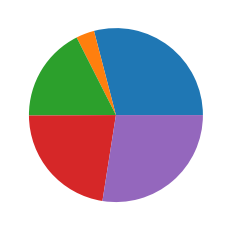

In [10]:
import matplotlib.pyplot as plt 

plt.pie(results['amount'])

In [11]:
df_current['address'].unique()

array(['0x00a2Ddfa736214563CEa9AEf5100f2e90c402918',
       '0x37341cbb14c5F128A70B149726ad8B2CE6F4C793',
       '0xB1B7586656116D546033e3bAFF69BFcD6592225E',
       '0x5E642f8C81DE40E7e49b6a2B606dFB94A005bC44',
       '0x76bc4C780Dd85558Bc4B24a4f262f4eB0bE78ca7',
       '0x7C418D7083f6c22B3d600B8fe4F0cf93564098dD',
       '0x3060fd5487a9f4184dA56bA6e09F4003c204660e',
       '0x639749b7b08aEe65039c21d8a411103C6ceBEBF0',
       '0x9A97Dbc9BAa91707B5bde45C810536C17b8cEB15',
       '0x2E7F4dD3acD226DdAe10246a45337F815CF6B3ff',
       '0x937F5b32Bc3cafcd1B02462F93e6AE5a843f6C6A',
       '0xF6BD8C23142533661D67dc2c724E12C6F43F5B1C'], dtype=object)